# Segmentez des clients d'un site e-commerce

# Importation des bibliothèques nécessaires

In [1]:
import sqlite3
import pandas as pd
import warnings
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Désactiver l'affichage des avertissements
warnings.filterwarnings('ignore')

In [3]:
# Configurer Pandas pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)


In [4]:
# Connexion à la base de données
conn = sqlite3.connect("olist.db")

# Lister les tables de la base
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

# Afficher les tables
print("Tables disponibles dans la base de données :")
print(tables)

# Fermer la connexion
conn.close()


Tables disponibles dans la base de données :
            name
0      customers
1         geoloc
2    order_items
3    order_pymts
4  order_reviews
5         orders
6       products
7        sellers
8    translation


## la table des clients 

In [5]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_customers = pd.read_sql_query("SELECT * FROM customers", conn)

# Fermer la connexion
conn.close()

In [6]:
# Afficher les premières lignes
df_customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_customers.columns 

Index(['index', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

## la table de la géolocalisation : 

In [8]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_geoloc = pd.read_sql_query("SELECT * FROM geoloc", conn)

# Fermer la connexion
conn.close()

In [9]:
# Afficher les premières lignes
df_geoloc.head()



,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
df_geoloc.columns 

Index(['index', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

## la table des commandes par catégorie : 

In [11]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_order_items = pd.read_sql_query("SELECT * FROM order_items", conn)

# Fermer la connexion
conn.close()

In [12]:
df_order_items.columns 

Index(['index', 'order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [13]:
# Afficher les premières lignes
df_order_items.head()


,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## la tables des payements: 

In [14]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_order_pymts = pd.read_sql_query("SELECT * FROM order_pymts", conn)

# Fermer la connexion
conn.close()

In [15]:
# Afficher les premières lignes
df_order_pymts.head()


,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
df_order_pymts.columns

Index(['index', 'order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

## la table des commentaires : 

In [17]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_order_reviews = pd.read_sql_query("SELECT * FROM order_reviews", conn)

# Fermer la connexion
conn.close()

In [18]:
# Afficher les premières lignes
df_order_reviews.head()



,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
df_order_reviews.columns 

Index(['index', 'review_id', 'order_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## la table des commandes: 

In [20]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_orders = pd.read_sql_query("SELECT * FROM orders", conn)

# Fermer la connexion
conn.close()

In [21]:
# Afficher les premières ligns 
df_orders.head()



,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
df_orders.columns 

Index(['index', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

## la tables des produits : 

In [23]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_products = pd.read_sql_query("SELECT * FROM products", conn)

# Fermer la connexion
conn.close()

In [24]:
# Afficher les premières lignes
df_products.head()



,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
df_products.columns 

Index(['index', 'product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

## la tables des vendeurs: 

In [26]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_sellers = pd.read_sql_query("SELECT * FROM sellers", conn)

# Fermer la connexion
conn.close()

In [27]:
# Afficher les premières lignes
df_sellers.head()



,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
df_sellers.columns 

Index(['index', 'seller_id', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

## la table de la traduction :

In [29]:
# Connexion à la base
conn = sqlite3.connect("olist.db")

# Charger une table spécifique en DataFrame
df_translation = pd.read_sql_query("SELECT * FROM translation", conn)

# Fermer la connexion
conn.close()

In [30]:

# Afficher les premières lignes
df_translation.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [31]:
df_translation.shape

(71, 3)

In [32]:
df_translation.columns

Index(['index', 'product_category_name', 'product_category_name_english'], dtype='object')

# joiture des tables :  

In [33]:
import pandas as pd

# Suppression de la colonne 'index' inutile
dfs = [df_customers, df_order_items, df_order_pymts, df_order_reviews,
       df_orders, df_products, df_sellers, df_translation]

for df in dfs:
    if 'index' in df.columns:
        df.drop(columns=['index'], inplace=True)

# 1️⃣ Fusion des commandes avec les clients
df_merged = df_orders.merge(df_customers, on='customer_id', how='left')

# 2️⃣ Ajout des articles de commande
df_merged = df_merged.merge(df_order_items, on='order_id', how='left')

# 3️⃣ Ajout des informations de paiement
df_merged = df_merged.merge(df_order_pymts, on='order_id', how='left')

# 4️⃣ Ajout des avis clients
df_merged = df_merged.merge(df_order_reviews, on='order_id', how='left')

# 5️⃣ Ajout des informations produits
df_merged = df_merged.merge(df_products, on='product_id', how='left')

# 6️⃣ Ajout des traductions des catégories de produits
df_merged = df_merged.merge(df_translation, on='product_category_name', how='left')

# 7️⃣ Ajout des informations vendeurs
df_merged = df_merged.merge(df_sellers, on='seller_id', how='left')

# ✅ Résultat final
print("Table fusionnée :", df_merged.shape)
df_merged


Table fusionnée : (119143, 40)


order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
119138  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
119139  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
119140  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119141  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119142  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
119138    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
119139    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
119140    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
119141    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
119142    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
119138          2018-02-07 23:22:42           2018-02-28 17:37:56   
119139          2017-08-28 20:52:26           2017-09-21 11:24:17   
119140          2018-01-12 15:35:03           2018-01-25 23:32:54   
119141          2018-01-12 15:35:03           2018-01-25 23:32:54   
119142          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
...                              ...                               ...   
119138           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
119139           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
119140           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
119141           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
119142           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                           3149     sao paulo             SP            1.0   
1                           3149     sao paulo             SP            1.0   
2                           3149     sao paulo             SP            1.0   
3                          47813     barreiras             BA            1.0   
4                          75265    vianopolis             GO            1.0   
...                          ...           ...            ...       

limit_output extension: Maximum message size of 10000 exceeded with 14549 characters

# Netoyage et Analyses de données : 

## visualiser les données manquantes 

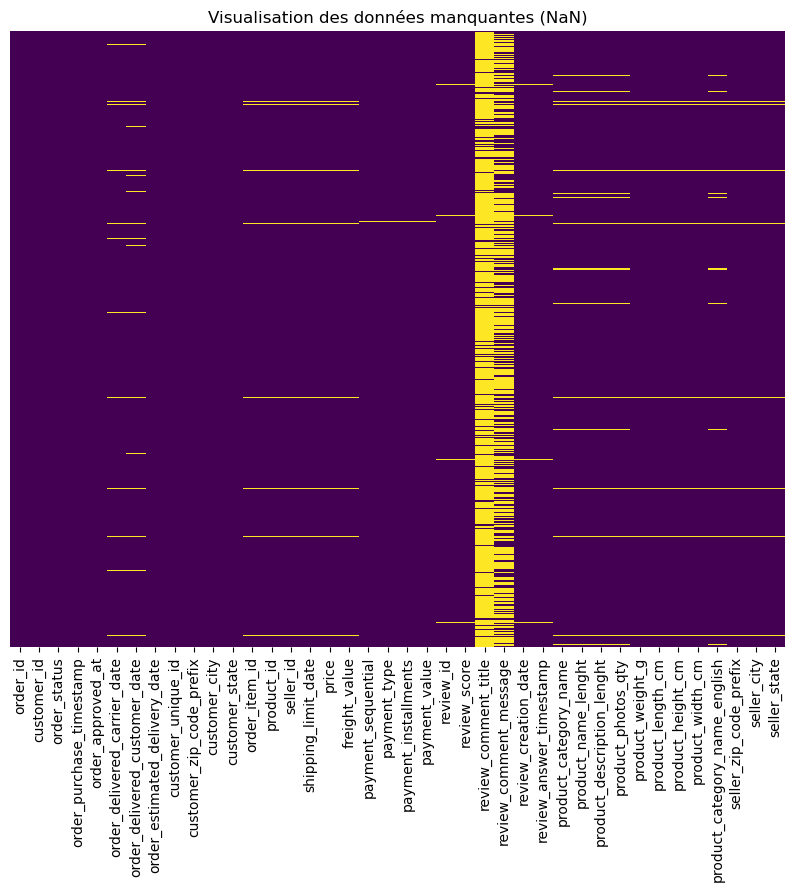

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une heatmap qui montre les NaN dans le DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.isna(), cbar=False, cmap='viridis', yticklabels=False, cbar_kws={'label': 'Missing Data'})

# Ajouter un titre
plt.title('Visualisation des données manquantes (NaN)')

# Afficher le graphique
plt.show()


In [35]:
df_merged.shape 


(119143, 40)

### visualisation de tout le data frame grace a sweetviz

In [36]:
report = sv.analyze(df_merged)

                                             |                                             | [  0%]   00:00 ->…

In [37]:
# Afficher le rapport dans un fichier HTML
report.show_html("sweetviz_report.html")

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## verrification des doublons dans les colonnes des ids : 

In [38]:
# Liste des colonnes d'ID
colonnes_id = ['order_id', 'customer_id', 'customer_unique_id', 'product_id', 'seller_id', 'review_id']

# Vérification des doublons pour chaque colonne d'ID
for col in colonnes_id:
    nb_doublons = df_merged[col].duplicated().sum()
    print(f"Nombre de doublons dans la colonne '{col}' : {nb_doublons}")

Nombre de doublons dans la colonne 'order_id' : 19702
Nombre de doublons dans la colonne 'customer_id' : 19702
Nombre de doublons dans la colonne 'customer_unique_id' : 23047
Nombre de doublons dans la colonne 'product_id' : 86191
Nombre de doublons dans la colonne 'seller_id' : 116047
Nombre de doublons dans la colonne 'review_id' : 20732


### Refflexions et descision métier :  

## Actions à envisager : 

In [39]:
doublons_order_id = df_merged[df_merged['order_id'].duplicated(keep=False)]
doublons_order_id

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
11      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
12      e69bfb5eb88e0ed6a785585b27e16dbf  31ad1d1b63eb9962463f764d4e6e0c9d   
...                                  ...                               ...   
119133  9115830be804184b91f5c00f6f49f92d  da2124f134f5dfbce9d06f29bdb6c308   
119134  aa04ef5214580b06b10e2a378300db44  f01a6bfcc730456317e4081fe0c9940e   
119135  aa04ef5214580b06b10e2a378300db44  f01a6bfcc730456317e4081fe0c9940e   
119140  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
119141  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
11        delivered      2017-07-29 11:55:02  2017-07-29 12:05:32   
12        delivered      2017-07-29 11:55:02  2017-07-29 12:05:32   
...             ...                      ...                  ...   
119133    delivered      2017-10-04 19:57:37  2017-10-04 20:07:14   
119134    delivered      2017-01-27 00:30:03  2017-01-27 01:05:25   
119135    delivered      2017-01-27 00:30:03  2017-01-27 01:05:25   
119140    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
119141    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
11              2017-08-10 19:45:24           2017-08-16 17:14:30   
12              2017-08-10 19:45:24           2017-08-16 17:14:30   
...                             ...                           ...   
119133          2017-10-05 16:52:52           2017-10-20 20:25:45   
119134          2017-01-30 11:40:16           2017-02-07 13:15:25   
119135          2017-01-30 11:40:16           2017-02-07 13:15:25   
119140          2018-01-12 15:35:03           2018-01-25 23:32:54   
119141          2018-01-12 15:35:03           2018-01-25 23:32:54   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
11               2017-08-23 00:00:00  299905e3934e9e181bfb2e164dd4b4f8   
12               2017-08-23 00:00:00  299905e3934e9e181bfb2e164dd4b4f8   
...                              ...                               ...   
119133           2017-11-07 00:00:00  c716cf2b5b86fb24257cffe9e7969df8   
119134           2017-03-17 00:00:00  e03dbdf5e56c96b106d8115ac336f47f   
119135           2017-03-17 00:00:00  e03dbdf5e56c96b106d8115ac336f47f   
119140           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
119141           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   

        customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                           3149     sao paulo             SP            1.0   
1                           3149     sao paulo             SP            1.0   
2                           3149     sao paulo             SP            1.0   
11                         18075      sorocaba             SP            1.0   
12                         18075      sorocaba             SP            1.0   
...                          ...           ...            ...       

limit_output extension: Maximum message size of 10000 exceeded with 14461 characters

## Supprimer les doublons: 

In [40]:
df_merged = df_merged.drop_duplicates(subset=['order_id'], keep='first')

## vérrification : 

In [41]:
# Liste des colonnes d'ID
colonnes_id = ['order_id', 'customer_id', 'customer_unique_id', 'product_id', 'seller_id', 'review_id']

# Vérification des doublons pour chaque colonne d'ID
for col in colonnes_id:
    nb_doublons = df_merged[col].duplicated().sum()
    print(f"Nombre de doublons dans la colonne '{col}' : {nb_doublons}")

Nombre de doublons dans la colonne 'order_id' : 0
Nombre de doublons dans la colonne 'customer_id' : 0
Nombre de doublons dans la colonne 'customer_unique_id' : 3345
Nombre de doublons dans la colonne 'product_id' : 67559
Nombre de doublons dans la colonne 'seller_id' : 96352
Nombre de doublons dans la colonne 'review_id' : 1284


## Exploration  des Données

In [42]:
# Résumé des informations générales
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   customer_unique_id             99441 non-null  object 
 9   customer_zip_code_prefix       99441 non-null  int64  
 10  customer_city                  99441 non-null  object 
 11  customer_state                 99441 non-null  object 
 12  order_item_id                  98666 non-null

In [43]:
# Vérifier les valeurs dupliquées
df_merged.duplicated().sum()

0

## Vérification des types de données

In [44]:
print(df_merged.dtypes)

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_t

## Convertir les dates en format datetime

In [45]:
# Conversion des colonnes de date en datetime
date_columns = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'review_creation_date',
    'review_answer_timestamp', 'shipping_limit_date'
]

for col in date_columns:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')


# Netoyage de données : 

## suppressiondes colonne 'review_comment_title', 'review_comment_message'
ces colonnes sont peut remplie et replassable pas la colonne de la note attribuée 

In [46]:
df_merged = df_merged.drop(columns=['review_comment_title', 'review_comment_message'])
df_merged.shape 

(99441, 38)

## y'a t'il encore des ligne avec des valeurs manquente ? 

In [47]:
# Repérer les lignes avec au moins une valeur manquante
lignes_avec_valeurs_manquantes = df_merged[df_merged.isna().any(axis=1)]

# Afficher les lignes avec des valeurs manquantes
lignes_avec_valeurs_manquantes

order_id                       customer_id  \
8       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
20      403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
51      ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
125     0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
129     bfe42c22ecbf90bc9f35cf591270b6a7  803ac05904124294f8767894d6da532b   
...                                  ...                               ...   
118946  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
118995  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
119039  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
119040  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
119112  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

       order_status order_purchase_timestamp   order_approved_at  \
8          invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
20        delivered      2018-01-02 19:00:43 2018-01-02 19:09:04   
51          shipped      2018-06-04 16:44:48 2018-06-05 04:31:18   
125        invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
129       delivered      2018-01-27 22:04:34 2018-01-27 22:16:18   
...             ...                      ...                 ...   
118946     canceled      2018-08-31 16:13:44                 NaT   
118995   processing      2018-01-05 23:07:24 2018-01-09 07:18:05   
119039     canceled      2018-09-06 18:45:47                 NaT   
119040  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
119112  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

       order_delivered_carrier_date order_delivered_customer_date  \
8                               NaT                           NaT   
20              2018-01-03 18:19:09           2018-01-20 01:38:59   
51              2018-06-05 14:32:00                           NaT   
125                             NaT                           NaT   
129             2018-02-03 03:56:00           2018-02-09 20:16:40   
...                             ...                           ...   
118946                          NaT                           NaT   
118995                          NaT                           NaT   
119039                          NaT                           NaT   
119040                          NaT                           NaT   
119112                          NaT                           NaT   

       order_estimated_delivery_date                customer_unique_id  \
8                         2017-05-09  36edbb3fb164b1f16485364b6fb04c73   
20                        2018-02-06  6e26bbeaa107ec34112c64e1ee31c0f5   
51                        2018-06-28  08fb46d35bb3ab4037202c23592d1259   
125                       2018-08-21  c7f8d7b1fffc946d7069574f74c39f4e   
129                       2018-02-26  34c58672601f2c6d29db7efd1f6bf958   
...                              ...                               ...   
118946                    2018-10-01  e90598185d2427a35e32ef241a5c04aa   
118995                    2018-02-06  965191786b70912f793e4a777fd623cd   
119039                    2018-09-27  d05c44a138277ad325d915c6b7ccbcdf   
119040                    2017-09-15  e72a90a2b29fe1a8795b284aaaa3246f   
119112                    2017-10-23  393d95c05b04db26ac084374094b3a52   

        customer_zip_code_prefix              customer_city customer_state  \
8                          98900                 santa rosa             RS   
20                         21381             rio de janeiro             RJ   
51                         13215                    jundiai             SP   
125                        88140  santo amaro da imperatriz             SC   
129                        38650      bonfinopolis de minas             MG   
...                          ...                        ...            ...   
118946        

limit_output extension: Maximum message size of 10000 exceeded with 12772 characters

## suppression des colonnes et des lignes innutiles : 

In [48]:
# Supprimer les lignes avec au moins une valeur manquante
df_merged = df_merged.dropna()

# Afficher le DataFrame après suppression des lignes manquantes
df_merged.shape

(94445, 38)

In [49]:
# Supprimer les lignes où 'order_status' est différent de 'delivered'
df_merged = df_merged.drop(df_merged[df_merged['order_status'] != 'delivered'].index)

# Afficher le DataFrame après suppression:
df_merged.shape

(94439, 38)

In [50]:
df_merged = df_merged.drop(columns=['product_category_name'])
df_merged.shape 

(94439, 37)

In [51]:
df_merged = df_merged.drop(columns=['customer_id'])
df_merged.shape 

(94439, 36)

In [52]:
df_merged = df_merged.drop(columns=['order_item_id','product_name_lenght', 'product_description_lenght'])
df_merged.shape 

(94439, 33)

In [53]:
df_merged = df_merged.drop(columns=['product_photos_qty','product_weight_g', 'product_length_cm',
                                    'product_height_cm', 'product_width_cm','seller_zip_code_prefix', 
                                    'seller_city', 'seller_state'])
df_merged.shape 

(94439, 25)

In [54]:
df_merged.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name_english'],
      dtype='object')

# Analyses Statistiques Descriptives

In [55]:
df_merged.describe()


,customer_zip_code_prefix,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
count,94439.000000,94439.000000,94439.000000,94439.000000,94439.000000,94439.000000,94439.000000
mean,35199.280139,125.159967,20.190951,1.022300,2.915967,157.142903,4.158144
std,29845.822384,188.319670,15.824810,0.233002,2.709431,215.008274,1.282603
min,1003.000000,0.850000,0.000000,1.000000,0.000000,0.010000,1.000000
25%,11360.000000,41.800000,13.320000,1.000000,1.000000,60.000000,4.000000
50%,24431.000000,79.000000,16.390000,1.000000,2.000000,103.040000,5.000000
75%,59056.000000,139.900000,21.250000,1.000000,4.000000,174.880000,5.000000
max,99980.000000,6735.000000,409.680000,19.000000,24.000000,13664.080000,5.000000


In [56]:
df_merged.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_name_english    0
dtype: int64

## order_id (Identifiant unique de la commande)

In [57]:
print("Nombre de commandes uniques :", df_merged['order_id'].nunique())


Nombre de commandes uniques : 94439


## Répartition des statuts de commande

delivered    94439
Name: order_status, dtype: int64


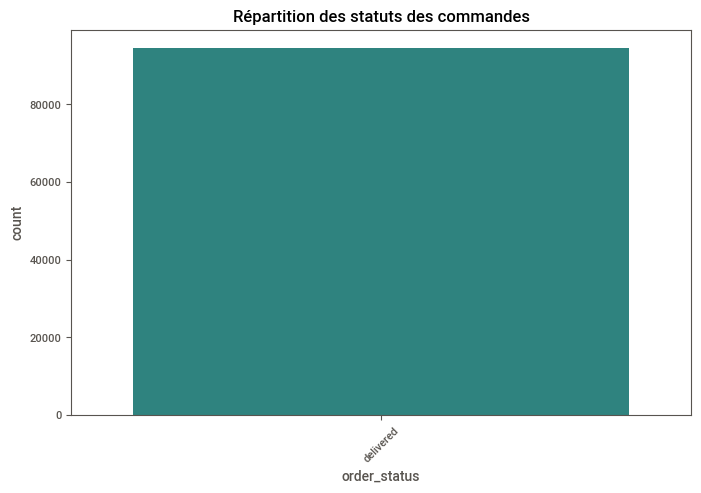

In [58]:
print(df_merged['order_status'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(data=df_merged, x='order_status', palette='viridis')
plt.xticks(rotation=45)
plt.title("Répartition des statuts des commandes")
plt.show()


## Calcul des KPI

### date premiere commande de l'extraction et derniere date ?  

In [59]:
# Assurez-vous que la colonne 'order_purchase_timestamp' est au format datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Trouver la première date
premiere_date = df_merged['order_purchase_timestamp'].min()

# Trouver la dernière date
derniere_date = df_merged['order_purchase_timestamp'].max()

# Afficher les résultats
print(f"La première date est : {premiere_date}")
print(f"La dernière date est : {derniere_date}")

La première date est : 2016-10-03 09:44:50
La dernière date est : 2018-08-29 15:00:37


## order_purchase_timestamp (Date et heure d'achat)

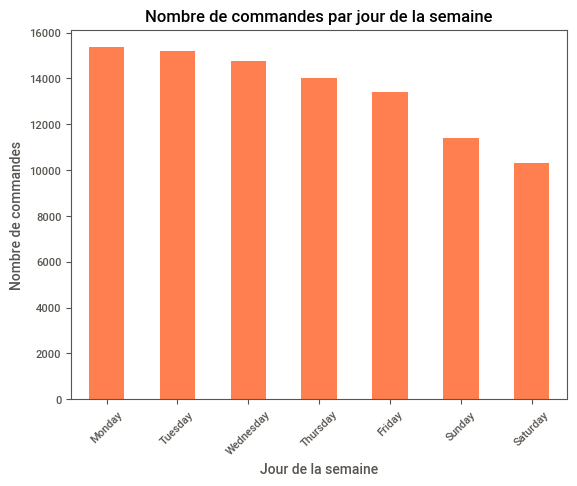

In [60]:
# analyse des achats par jours de la semaine : 
df_merged['purchase_day'] = df_merged['order_purchase_timestamp'].dt.day_name()
df_merged['purchase_day'].value_counts().plot(kind='bar', color='coral')
plt.title("Nombre de commandes par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.show()


## order_delivered_customer_date (Date de livraison au client)

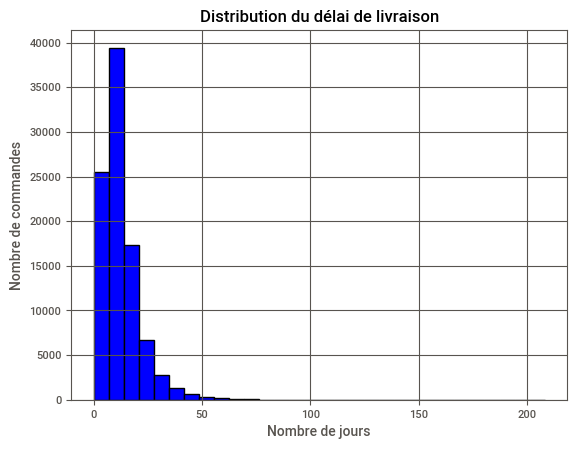

In [61]:
# Calcul du délai de livraison réel :
df_merged['order_delivered_customer_date'] = pd.to_datetime(df_merged['order_delivered_customer_date'])
df_merged['delivery_time'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days
df_merged['delivery_time'].hist(bins=30, color='blue', edgecolor='black')
plt.title("Distribution du délai de livraison")
plt.xlabel("Nombre de jours")
plt.ylabel("Nombre de commandes")
plt.show()

 

## order_estimated_delivery_date (Date estimée de livraison)

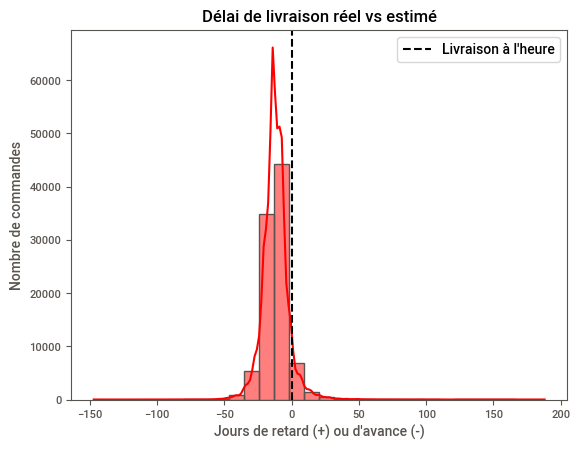

In [62]:
#Comparaison des délais réels vs estimés :
df_merged['order_estimated_delivery_date'] = pd.to_datetime(df_merged['order_estimated_delivery_date'])
df_merged['delivery_delay'] = (df_merged['order_delivered_customer_date'] - df_merged['order_estimated_delivery_date']).dt.days
sns.histplot(df_merged['delivery_delay'], bins=30, kde=True, color='red')
plt.axvline(0, color='black', linestyle='dashed', label="Livraison à l'heure")
plt.legend()
plt.title("Délai de livraison réel vs estimé")
plt.xlabel("Jours de retard (+) ou d'avance (-)")
plt.ylabel("Nombre de commandes")
plt.show()


## customer_city et customer_state (Localisation du client)
Top 10 des villes avec le plus de commandes :

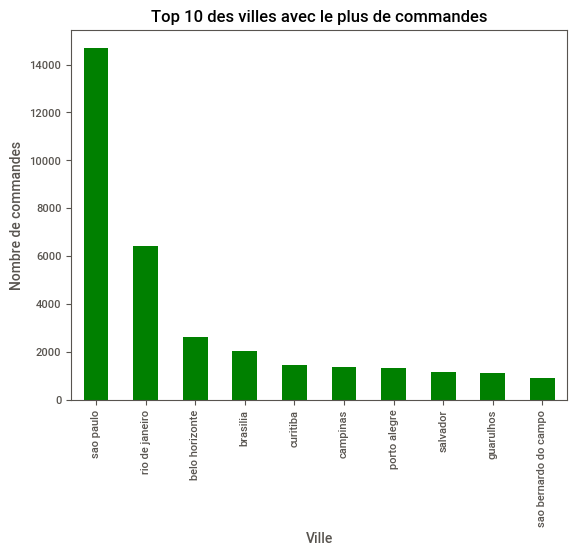

In [63]:
df_merged['customer_city'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 des villes avec le plus de commandes")
plt.xlabel("Ville")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=90)
plt.show()

## price (Prix du produit)
Distribution des prix :

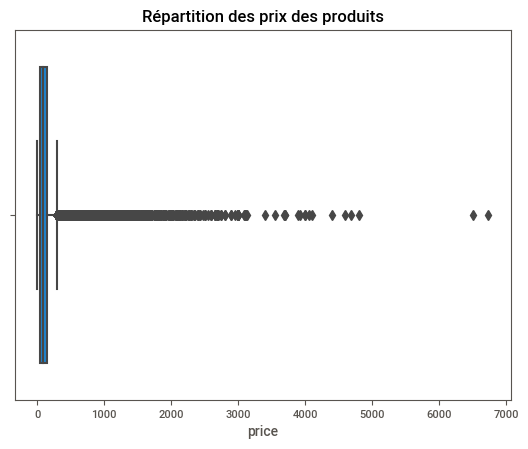

In [64]:
sns.boxplot(x=df_merged['price'])
plt.title("Répartition des prix des produits")
plt.show()

## freight_value (Frais de livraison)
Corrélation avec le prix du produit :

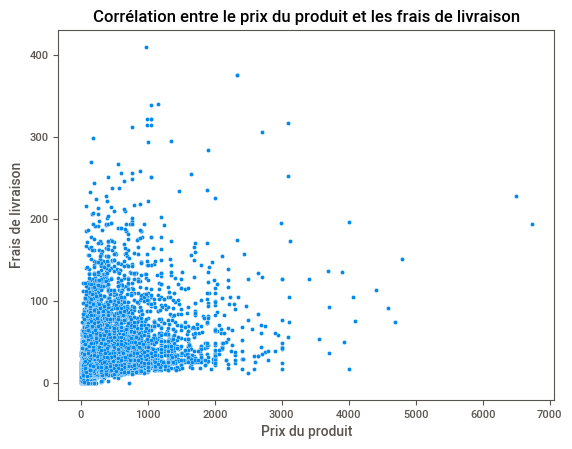

In [65]:
sns.scatterplot(x=df_merged['price'], y=df_merged['freight_value'])
plt.title("Corrélation entre le prix du produit et les frais de livraison")
plt.xlabel("Prix du produit")
plt.ylabel("Frais de livraison")
plt.show()


## payment_type (Mode de paiement)

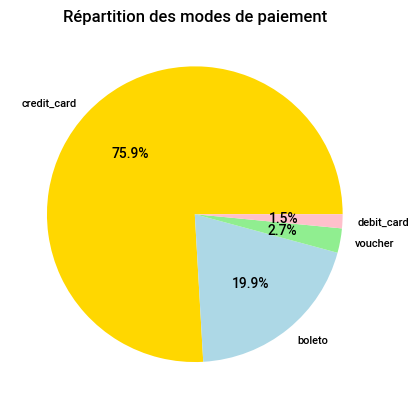

In [66]:
df_merged['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen', 'pink'])
plt.title("Répartition des modes de paiement")
plt.ylabel("")
plt.show()


## review_score (Notes des clients)
Distribution des notes :

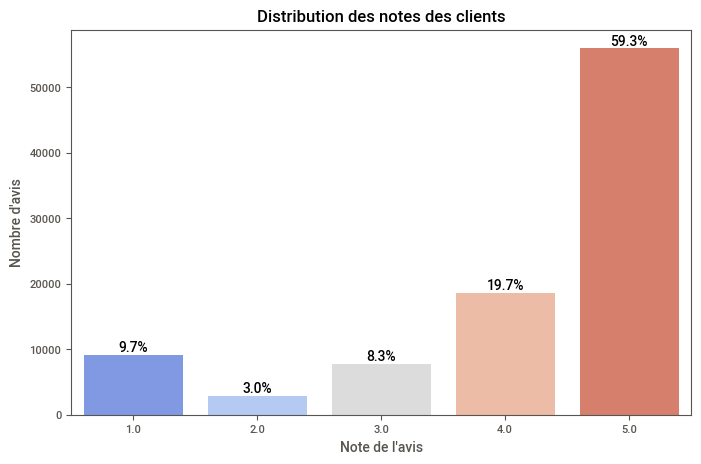

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le countplot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_merged, x='review_score', palette='coolwarm')

# Ajouter les pourcentages
total = len(df_merged)  # Nombre total d'observations
for p in ax.patches:
    height = p.get_height()  # Hauteur de la barre (nombre d'observations)
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Position x du texte (au centre de la barre)
        height + 0.5,  # Position y du texte (légèrement au-dessus de la barre)
        f'{height / total * 100:.1f}%',  # Texte du pourcentage
        ha='center',  # Alignement horizontal au centre
        va='bottom'   # Alignement vertical en bas
    )

# Ajouter un titre
plt.title("Distribution des notes des clients")
plt.xlabel("Note de l'avis")
plt.ylabel("Nombre d'avis")

# Afficher le graphique
plt.show()

## product_category_name_english (Catégorie du produit)
Top 10 des catégories les plus vendues :

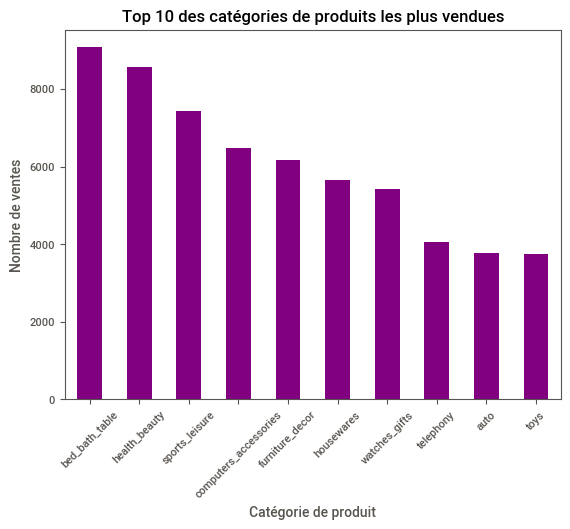

In [68]:
df_merged['product_category_name_english'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 des catégories de produits les plus vendues")
plt.xlabel("Catégorie de produit")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)
plt.show()


## order_purchase_timestamp (Date et heure d'achat)
Analyse de la saisonnalité des achats (sur l'année ou le mois) :
Observe les tendances d'achat au fil du temps.

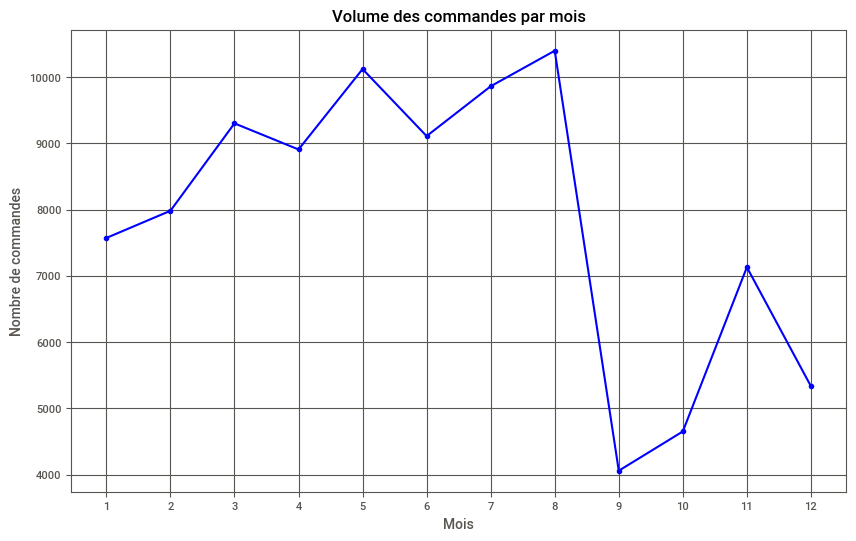

In [69]:
df_merged['purchase_month'] = df_merged['order_purchase_timestamp'].dt.month
df_merged.groupby('purchase_month').size().plot(kind='line', marker='o', color='blue', figsize=(10,6))
plt.title("Volume des commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


## order_delivered_customer_date (Date de livraison au client)
Analyse des délais de livraison par statut de commande :
Vérifie si les commandes en retard ont un certain statut.

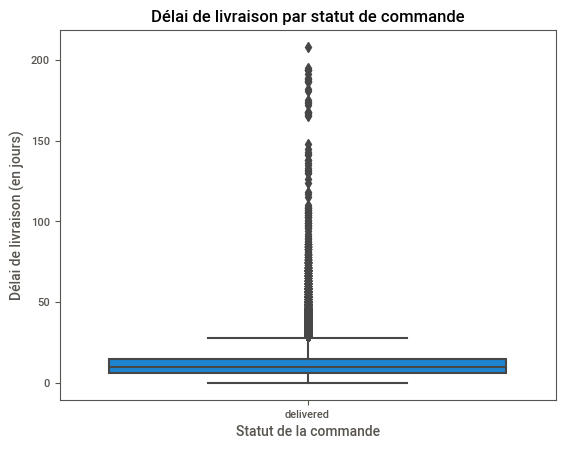

In [70]:
df_merged['delivery_time'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days
sns.boxplot(x='order_status', y='delivery_time', data=df_merged)
plt.title("Délai de livraison par statut de commande")
plt.xlabel("Statut de la commande")
plt.ylabel("Délai de livraison (en jours)")
plt.show()


## Chiffre d'Affaires (CA)

In [71]:
chiffre_affaires = df_merged['payment_value'].sum()
print(f"Chiffre d'Affaires Total : {chiffre_affaires:.2f} real")

Chiffre d'Affaires Total : 14840418.57 real


## Valeur Moyenne du Panier (VMP)

In [72]:
vmp = df_merged.groupby('order_id')['payment_value'].sum().mean()
print(f"Valeur Moyenne du Panier : {vmp:.2f} real")


Valeur Moyenne du Panier : 157.14 real


## Nombre de commandes par client

In [73]:
commandes_par_client = df_merged.groupby('customer_unique_id')['order_id'].nunique()
print(f"Nombre moyen de commandes par client : {commandes_par_client.mean():.2f}")


Nombre moyen de commandes par client : 1.03


## Délais de livraison moyen

In [74]:
df_merged['delai_livraison'] = (
    df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']
).dt.days

delai_livraison_moyen = df_merged['delai_livraison'].mean()
print(f"Délais moyen de livraison : {delai_livraison_moyen:.2f} jours")


Délais moyen de livraison : 12.05 jours


## KPI TIME /

In [75]:

# Calcul des KPIs
# 1. Délai moyen d'approbation des commandes (en heures)
df_merged['delai_approbation'] = (df_merged['order_approved_at'] - df_merged['order_purchase_timestamp']).dt.total_seconds() / 3600

# 2. Délai moyen de préparation des commandes (en heures)
df_merged['delai_preparation'] = (df_merged['order_delivered_carrier_date'] - df_merged['order_approved_at']).dt.total_seconds() / 3600

# 3. Délai moyen de livraison par le transporteur (en heures)
df_merged['delai_livraison_transporteur'] = (df_merged['order_delivered_customer_date'] - df_merged['order_delivered_carrier_date']).dt.total_seconds() / 3600

# 4. Délai total de traitement des commandes (en jours)
df_merged['delai_total_traitement'] = (df_merged['order_delivered_customer_date'] - df_merged['order_purchase_timestamp']).dt.days

# 5. Pourcentage de commandes livrées à temps
df_merged['livraison_a_temps'] = df_merged['order_delivered_customer_date'] <= df_merged['order_estimated_delivery_date']
taux_livraison_a_temps = df_merged['livraison_a_temps'].mean() * 100

# 6. Délai moyen de réponse aux avis (en heures)
df_merged['delai_reponse_avis'] = (df_merged['review_answer_timestamp'] - df_merged['review_creation_date']).dt.total_seconds() / 3600

# 7. Nombre de commandes livrées après la date limite
df_merged['livraison_apres_limite'] = df_merged['order_delivered_customer_date'] > df_merged['order_estimated_delivery_date']
nombre_livraisons_apres_limite = df_merged['livraison_apres_limite'].sum()

# 8. Temps moyen de transit par transporteur (en heures)
temps_moyen_transporteur = df_merged['delai_livraison_transporteur'].mean()


# Affichage des résultats
print(f"1. Délai moyen d'approbation : {df_merged['delai_approbation'].mean():.2f} heures")
print(f"2. Délai moyen de préparation : {df_merged['delai_preparation'].mean():.2f} heures")
print(f"3. Délai moyen de livraison par le transporteur : {df_merged['delai_livraison_transporteur'].mean():.2f} heures")
print(f"4. Délai total moyen de traitement des commandes : {df_merged['delai_total_traitement'].mean():.2f} jours")
print(f"5. Pourcentage de commandes livrées à temps : {taux_livraison_a_temps:.2f}%")
print(f"6. Délai moyen de réponse aux avis : {df_merged['delai_reponse_avis'].mean():.2f} heures")
print(f"7. Nombre de commandes livrées après la date limite : {nombre_livraisons_apres_limite}")
print(f"8. Temps moyen de transit par transporteur : {temps_moyen_transporteur:.2f} heures")


1. Délai moyen d'approbation : 10.28 heures
2. Délai moyen de préparation : 66.87 heures
3. Délai moyen de livraison par le transporteur : 223.16 heures
4. Délai total moyen de traitement des commandes : 12.05 jours
5. Pourcentage de commandes livrées à temps : 92.02%
6. Délai moyen de réponse aux avis : 75.62 heures
7. Nombre de commandes livrées après la date limite : 7539
8. Temps moyen de transit par transporteur : 223.16 heures


## Évolution du chiffre d'affaires par mois

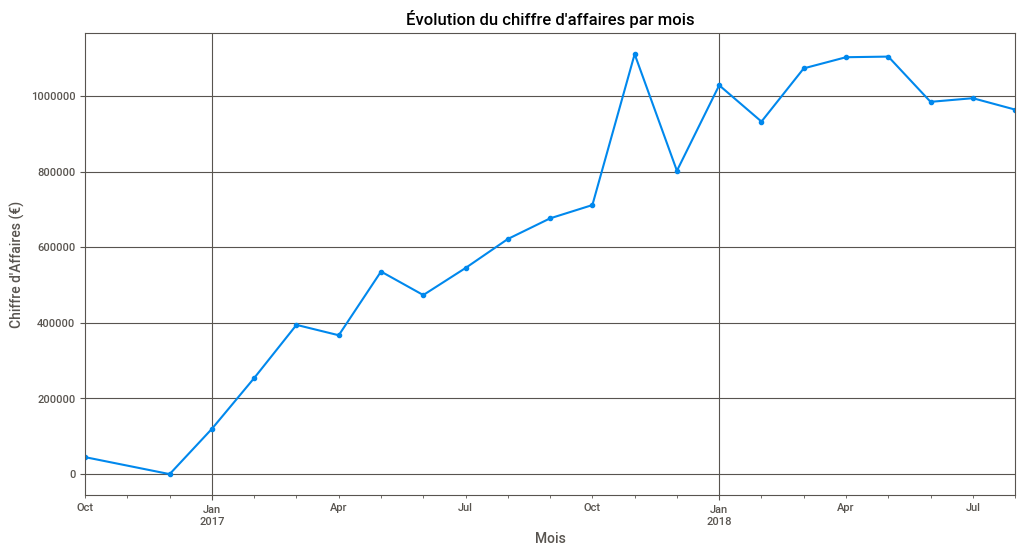

In [76]:
df_merged['mois'] = df_merged['order_purchase_timestamp'].dt.to_period('M')
ca_mensuel = df_merged.groupby('mois')['payment_value'].sum()

plt.figure(figsize=(12, 6))
ca_mensuel.plot(marker='o', linestyle='-')
plt.title("Évolution du chiffre d'affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'Affaires (€)")
plt.grid()
plt.show()


# travailler sur les variable catégorielles 

In [77]:
df_merged.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name_english', 'purchase_day', 'delivery_time',
       'delivery_delay', 'purchase_month', 'delai_livraison',
       'delai_approbation', 'delai_preparation',
       'delai_livraison_transporteur', 'delai_total_traitement',
       'livraison_a_temps', 'delai_reponse_avis', 'livraison_apres_limite',
       'mois'],
      dtype='object')

In [78]:
df_merged.shape 

(94439, 38)

In [79]:
df_merged.head(5)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name_english,purchase_day,delivery_time,delivery_delay,purchase_month,delai_livraison,delai_approbation,delai_preparation,delai_livraison_transporteur,delai_total_traitement,livraison_a_temps,delai_reponse_avis,livraison_apres_limite,mois
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11,2017-10-12 03:43:48,housewares,Monday,8,-8,10,8,0.178333,56.795833,145.503611,8,True,27.730000,False,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08,2018-08-08 18:37:50,perfumery,Tuesday,13,-6,7,13,30.713889,11.109167,288.945833,13,True,18.630556,False,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18,2018-08-22 19:07:58,auto,Wednesday,9,-18,8,9,0.276111,4.910278,220.274722,9,True,115.132778,False,2018-08
5,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03,2017-12-05 19:21:58,pet_shop,Saturday,13,-13,11,13,0.298056,89.900000,226.811944,13,True,67.366111,False,2017-11
6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17,2018-02-18 13:02:51,stationery,Tuesday,2,-10,2,2,1.030556,21.434722,46.507778,2,True,37.047500,False,2018-02


In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94439 entries, 0 to 119142
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94439 non-null  object        
 1   order_status                   94439 non-null  object        
 2   order_purchase_timestamp       94439 non-null  datetime64[ns]
 3   order_approved_at              94439 non-null  datetime64[ns]
 4   order_delivered_carrier_date   94439 non-null  datetime64[ns]
 5   order_delivered_customer_date  94439 non-null  datetime64[ns]
 6   order_estimated_delivery_date  94439 non-null  datetime64[ns]
 7   customer_unique_id             94439 non-null  object        
 8   customer_zip_code_prefix       94439 non-null  int64         
 9   customer_city                  94439 non-null  object        
 10  customer_state                 94439 non-null  object        
 11  product_id    

### quel variable sont catégorielles ? 

In [81]:
# Sélectionner toutes les colonnes catégorielles
categorical_columns = df_merged.select_dtypes(include=['object', 'bool']).columns

# Afficher les colonnes catégorielles
print(categorical_columns)


Index(['order_id', 'order_status', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'payment_type',
       'review_id', 'product_category_name_english', 'purchase_day',
       'livraison_a_temps', 'livraison_apres_limite'],
      dtype='object')


In [82]:
df_cat = df_merged[['order_id', 'order_status', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'seller_id', 'payment_type',
       'review_id', 'product_category_name_english', 'purchase_day',
       'livraison_a_temps', 'livraison_apres_limite']]
df_cat

,order_id,order_status,customer_unique_id,customer_city,customer_state,product_id,seller_id,payment_type,review_id,product_category_name_english,purchase_day,livraison_a_temps,livraison_apres_limite
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,credit_card,a54f0611adc9ed256b57ede6b6eb5114,housewares,Monday,True,False
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,af07308b275d755c9edb36a90c618231,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,boleto,8d5266042046a06655c8db133d120ba5,perfumery,Tuesday,True,False
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,credit_card,e73b67b67587f7644d5bd1a52deb1b01,auto,Wednesday,True,False
5,949d5b44dbf5de918fe9c16f97b45f8a,delivered,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,credit_card,359d03e676b3c069f62cadba8dd3f6e8,pet_shop,Saturday,True,False
6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,credit_card,e50934924e227544ba8246aeb3770dd4,stationery,Tuesday,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,delivered,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,credit_card,e262b3f92d1ce917aa412a9406cf61a6,health_beauty,Thursday,True,False
119138,63943bddc261676b46f01ca7ac2f7bd8,delivered,da62f9e57a76d978d02ab5362c509660,praia grande,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,credit_card,29bb71b2760d0f876dfa178a76bc4734,baby,Tuesday,True,False
119139,83c1379a015df1e13d02aae0204711ab,delivered,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,credit_card,371579771219f6db2d830d50805977bb,home_appliances_2,Sunday,True,False
119140,11c177c8e97725db2631073c19f07b62,delivered,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,credit_card,8ab6855b9fe9b812cd03a480a25058a1,computers_accessories,Monday,True,False


In [83]:
df_merged = df_merged.drop(columns=['order_status'])
df_merged.shape 

(94439, 37)

In [84]:
df_merged = df_merged.drop(columns=['shipping_limit_date'])
df_merged.shape 

(94439, 36)

In [86]:
df_merged = df_merged.drop(columns=['order_approved_at', 'delai_reponse_avis', 'order_id', 'product_id', 'seller_id'])
df_merged.shape 

(94439, 31)

In [89]:
df_merged = df_merged.drop(columns=['customer_city', 'review_id', 'product_category_name_english'])
df_merged.shape 

(94439, 28)

In [90]:
df_merged = df_merged.drop(columns=['customer_zip_code_prefix'])
df_merged.shape 

(94439, 27)

In [ ]:
df_merged['customer_state'].value_counts()

In [ ]:
df_merged['payment_type'].value_counts()

## transformer les colonne catégorielle : 

In [92]:
# Choisir les colonnes catégorielles à encoder
categorical_columns = ['customer_state', 'payment_type', 'purchase_day', 'livraison_a_temps', 'livraison_apres_limite']

# Appliquer One-Hot Encoding sur les colonnes catégorielles
df_merged = pd.get_dummies(df_merged, columns=categorical_columns, drop_first=False)

# Afficher les premières lignes du DataFrame encodé
df_merged.head()

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,delivery_time,delivery_delay,purchase_month,delai_livraison,delai_approbation,delai_preparation,delai_livraison_transporteur,delai_total_traitement,mois,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,customer_state_GO,customer_state_MA,customer_state_MG,customer_state_MS,customer_state_MT,customer_state_PA,customer_state_PB,customer_state_PE,customer_state_PI,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,purchase_day_Friday,purchase_day_Monday,purchase_day_Saturday,purchase_day_Sunday,purchase_day_Thursday,purchase_day_Tuesday,purchase_day_Wednesday,livraison_a_temps_False,livraison_a_temps_True,livraison_apres_limite_False,livraison_apres_limite_True
0,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,29.99,8.72,1.0,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,8,-8,10,8,0.178333,56.795833,145.503611,8,2017-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
3,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,118.70,22.76,1.0,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,13,-6,7,13,30.713889,11.109167,288.945833,13,2018-07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,159.90,19.22,1.0,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,9,-18,8,9,0.276111,4.910278,220.274722,9,2018-08,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
5,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,45.00,27.20,1.0,1.0,72.20,5.0,2017-12-03,2017-12-05 19:21:58,13,-13,11,13,0.298056,89.900000,226.811944,13,2017-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
6,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,19.90,8.72,1.0,1.0,28.62,5.0,2018-02-17,2018-02-18 13:02:51,2,-10,2,2,1.030556,21.434722,46.507778,2,2018-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0


## Dernieres colonnes à supprimer : 

In [97]:
colonne_a_supprimer = ['order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_installments', 'payment_sequential', 'review_creation_date',
       'review_answer_timestamp', 'delai_approbation', 'delai_preparation',
       'delai_livraison_transporteur', 'mois']

# Supprimer les colonnes
df_merged = df_merged.drop(columns=colonne_a_supprimer)

# Vérifier que les colonnes ont bien été supprimées
print("Colonnes restantes après suppression :")
print(df_merged.columns)

Colonnes restantes après suppression :
Index(['order_purchase_timestamp', 'customer_unique_id', 'price',
       'freight_value', 'payment_value', 'review_score', 'delivery_time',
       'delivery_delay', 'purchase_month', 'delai_livraison',
       'delai_total_traitement', 'customer_state_AC', 'customer_state_AL',
       'customer_state_AM', 'customer_state_AP', 'customer_state_BA',
       'customer_state_CE', 'customer_state_DF', 'customer_state_ES',
       'customer_state_GO', 'customer_state_MA', 'customer_state_MG',
       'customer_state_MS', 'customer_state_MT', 'customer_state_PA',
       'customer_state_PB', 'customer_state_PE', 'customer_state_PI',
       'customer_state_PR', 'customer_state_RJ', 'customer_state_RN',
       'customer_state_RO', 'customer_state_RR', 'customer_state_RS',
       'customer_state_SC', 'customer_state_SE', 'customer_state_SP',
       'customer_state_TO', 'payment_type_boleto', 'payment_type_credit_card',
       'payment_type_debit_card', 'payment_ty

In [98]:
df_merged.shape

(94439, 53)

#  Enregistrer df_merged en fichier CSV

In [99]:

df_merged.to_csv('df_merged.csv', index=False)
